#### Introduction

##### Optimize the Loan eligibility process
###### Predict Loan Eligibility for Dream Housing Finance company
Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers.

#### Import Libraries

In [265]:
import pandas as pd  # for working with tabular data e.g, csv. load or manipulate data.
import numpy as np   # numerical computations, creating arrays. 
import seaborn as sns  # statistical plotting
import matplotlib.pyplot as plt  # core plotting library

#### Load Dataset

In [267]:
train_df = pd.read_csv ('train.csv')

In [268]:
test_df = pd.read_csv ('test.csv')

#### Exploratory Data Analysis

###### Data Overview and Structure

In [271]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [272]:
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [273]:
train_df.shape

(614, 13)

In [274]:
test_df.shape

(367, 12)

In [275]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [276]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


###### Summary Statistics

In [278]:
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


##### count: number of non-missing values or the valid observations. LoanAmount, Loan_Amount_Term and Credit_History have 592, 600 and 564 valid data points respectively meaning that the three columns have missing values. the counts vary indicating missing data.
##### Mean (Average): show the average income approximates, average LoanAmount-loaned out, average Loan_Amount_Term-342 likely in months, average credit history at 0.84 suggests a binary variable where a value close to 1 indicates good credit history. average ApplicantIncome (5403) is higher than the average CoapplicantIncome (614).
##### std (standard deviation): ApplicantIncome is 6106 indicates a wide spread in ApplicantIncome. CoapplicantIncome is 2926 shows variability. LoanAmount is 85 shows moderate variability. Loan_Amount_Term is 65 shos variation in loan terms. Credit_History is 0.36 shows less variability (0 or 1). ApplicantIncome has the highest variability which reflects diverse income levels.
##### Min (minimun): The presence of 0 in CoapplicantIncome and Credit_History suggests absent data or some applicant have no coapplicant or coapplicant income. min Loan_Amount_Term that the company can give out loan is for 12months. credit_History is zero, some of the applicant ofr loan have no credit history. no data in CoapplicantIncome and Credit_History.
##### 25% (25th percentile): applicantincome-25% percent earned 2,877 or less. 25% have no coapllicantincome (median). 25% laanAmount are 100 or less.
##### 50%: of applicant earned 3,812 or less. 50% have 1,188 or lessin coapplicanIncome. of loans are 128 or less.
##### 75%: of applicant earned 5,795 or less. have 2,297 or less coapplicantIncome. of loan amount are 168 or less.
##### Loan_Amount_Term for all percentiles is 360 months. Credit_History for all percentile is 1 which indicates a good credit history. the 50% median values are lower than the means(average) for ApplicantIncome, CoapplicantIncome suggestion skewness. mean is less than median(right skewed)
##### Max (maximum): max applicant income is 81,000. max coapplicantIncome is 41,667. max loan amount is 700. max loan term is 480 months. max credit history is 1. max ApplicantIncome shows extreme outliers-81,000 compaired to the mean(average) 5,403.

In [280]:
test_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [281]:
train_df.nunique() # counts the number of distinct (unique) values for each column.

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [282]:
test_df.nunique()

Loan_ID              367
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      314
CoapplicantIncome    194
LoanAmount           144
Loan_Amount_Term      12
Credit_History         2
Property_Area          3
dtype: int64

In [283]:
for col in ['Gender', 'Married', 'Education']:
    print(f"\nValue counts for {col}:")
    print(train_df[col].value_counts())


Value counts for Gender:
Gender
Male      489
Female    112
Name: count, dtype: int64

Value counts for Married:
Married
Yes    398
No     213
Name: count, dtype: int64

Value counts for Education:
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


In [284]:
for col in ['Gender', 'Married', 'Education']:
    print(f"\nValue counts for {col}:")
    print(test_df[col].value_counts())



Value counts for Gender:
Gender
Male      286
Female     70
Name: count, dtype: int64

Value counts for Married:
Married
Yes    233
No     134
Name: count, dtype: int64

Value counts for Education:
Education
Graduate        283
Not Graduate     84
Name: count, dtype: int64


###### Missing Value Check

In [286]:
train_df.isnull().sum() # count the missing values for each column

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [287]:
test_df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [288]:
train_df.duplicated().sum() # counts how many duplicate rows

0

In [289]:
test_df.duplicated().sum()

0

###### Data Distribution

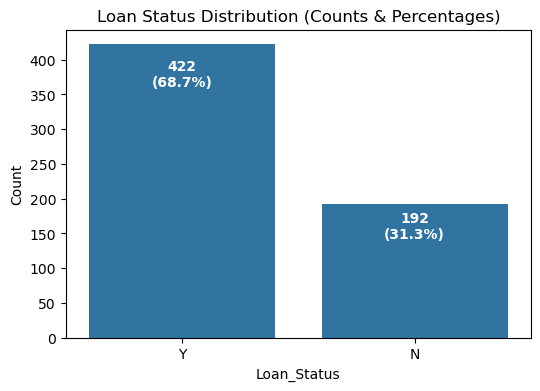

In [291]:
# Countplot
plt.figure(figsize=(6,4))
ax = sns.countplot(data=train_df, x='Loan_Status')

# Add counts and percentages inside bars
total = len(train_df)
for p in ax.patches:
    count = int(p.get_height())  # bar height = count
    percentage = 100 * count / total
    
    # Position annotation inside the bar
    ax.annotate(f'{count}\n({percentage:.1f}%)', 
                (p.get_x() + p.get_width() / 2., p.get_height() - (p.get_height() * 0.05)),  
                ha='center', va='top', fontsize=10, color='white', fontweight='bold')

plt.title('Loan Status Distribution (Counts & Percentages)')
plt.ylabel('Count')
plt.show()

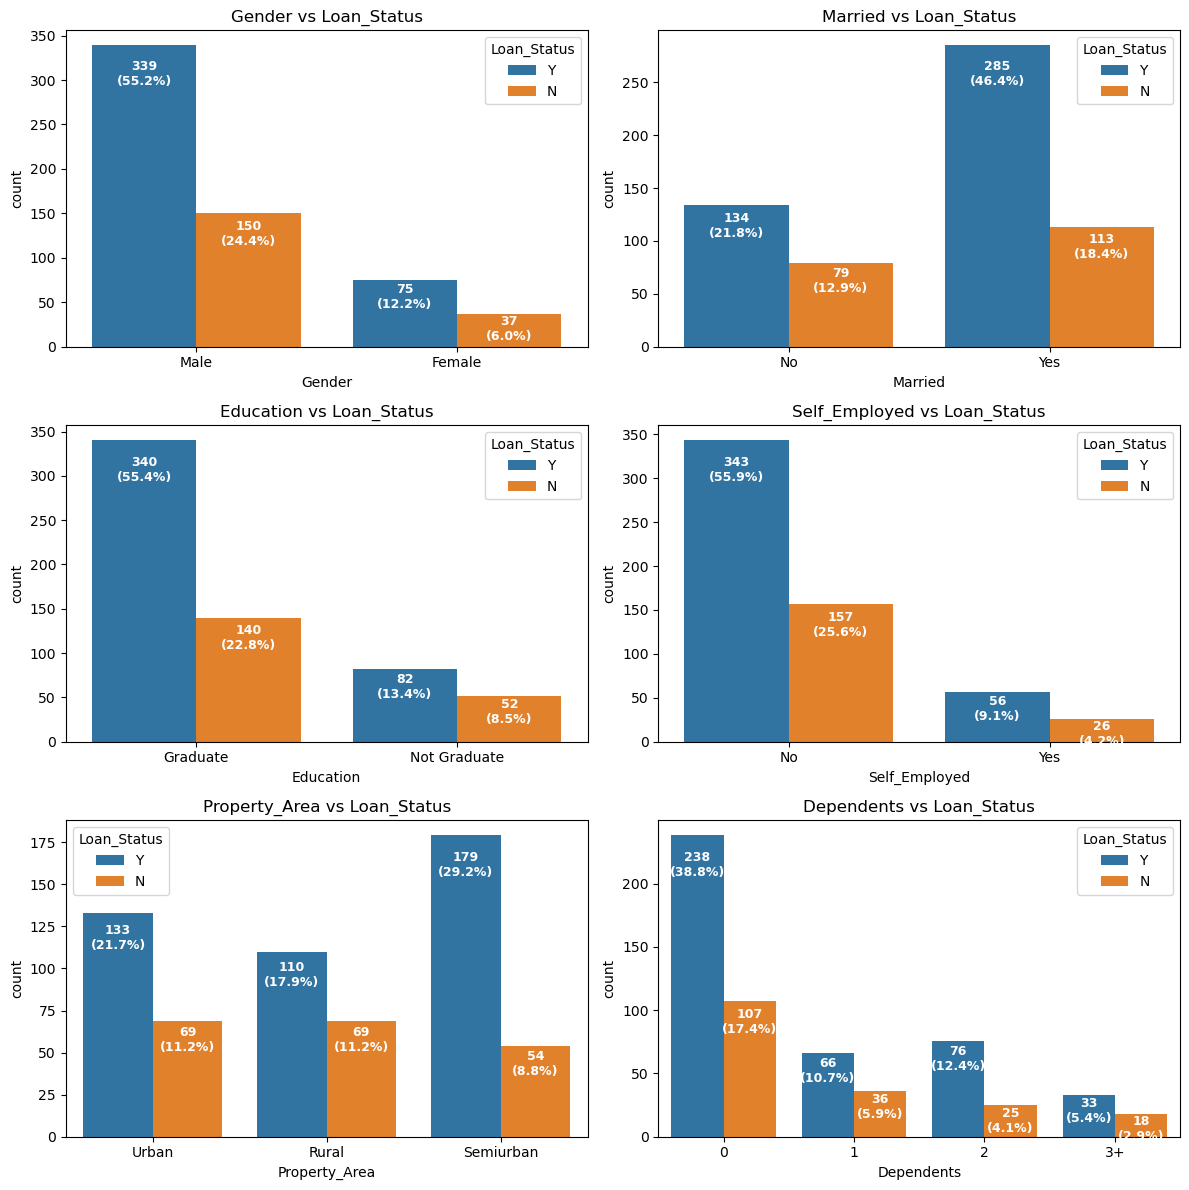

In [292]:
# Categorical columns to plot
categorical_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Dependents']
n_cols = 2  # Number of columns (side-by-side plots)
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols  # Calculate rows needed

plt.figure(figsize=(12, 4 * n_rows))  # Adjust figure size

# Loop through each categorical column
for idx, col in enumerate(categorical_cols):
    plt.subplot(n_rows, n_cols, idx + 1)  # Create subplot
    ax = sns.countplot(x=col, hue='Loan_Status', data=train_df)

    # Add count and percentage labels INSIDE bars
    total = len(train_df)
    for p in ax.patches:
        count = int(p.get_height())
        if count > 0:  # Skip zero counts
            percentage = f"{100 * count / total:.1f}%"
            ax.annotate(f"{count}\n({percentage})",
                        (p.get_x() + p.get_width() / 2., p.get_height() - (p.get_height() * 0.05)),
                        ha='center', va='top', fontsize=9, color='white', fontweight='bold')

    plt.title(f'{col} vs Loan_Status')

plt.tight_layout()
plt.show()

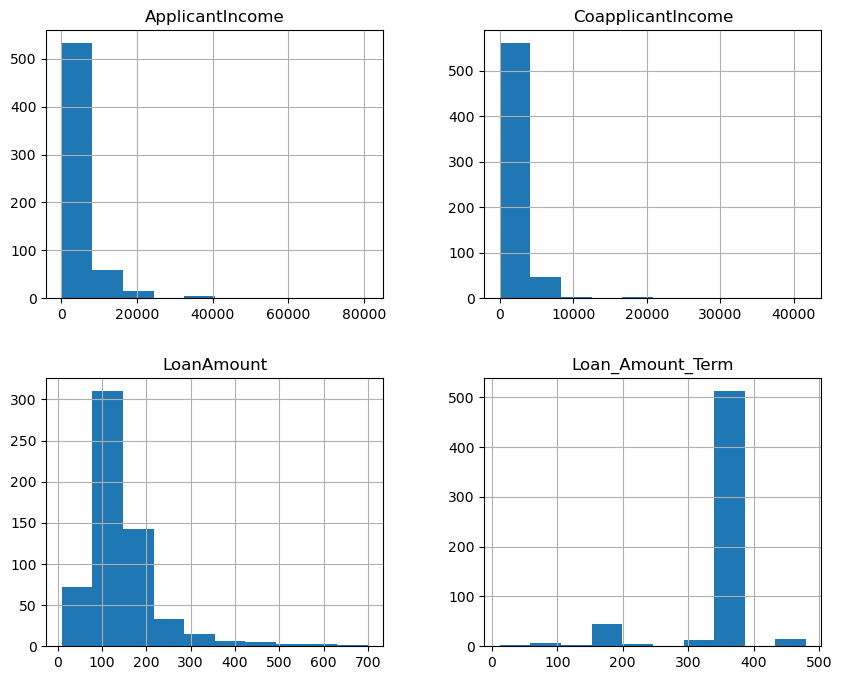

In [293]:
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

train_df[numerical_cols].hist(figsize=(10,8))
plt.show()

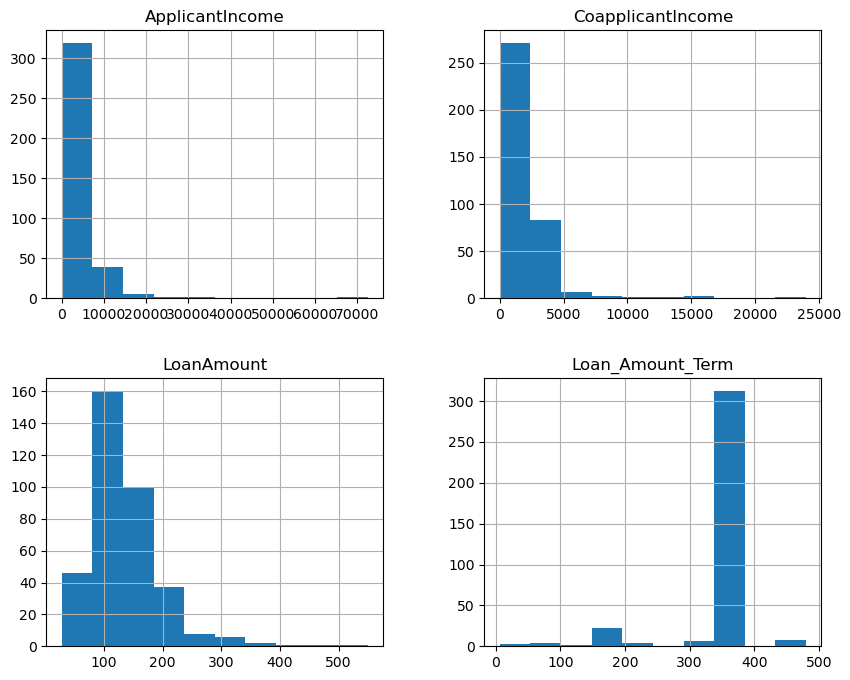

In [294]:
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

test_df[numerical_cols].hist(figsize=(10,8))
plt.show()

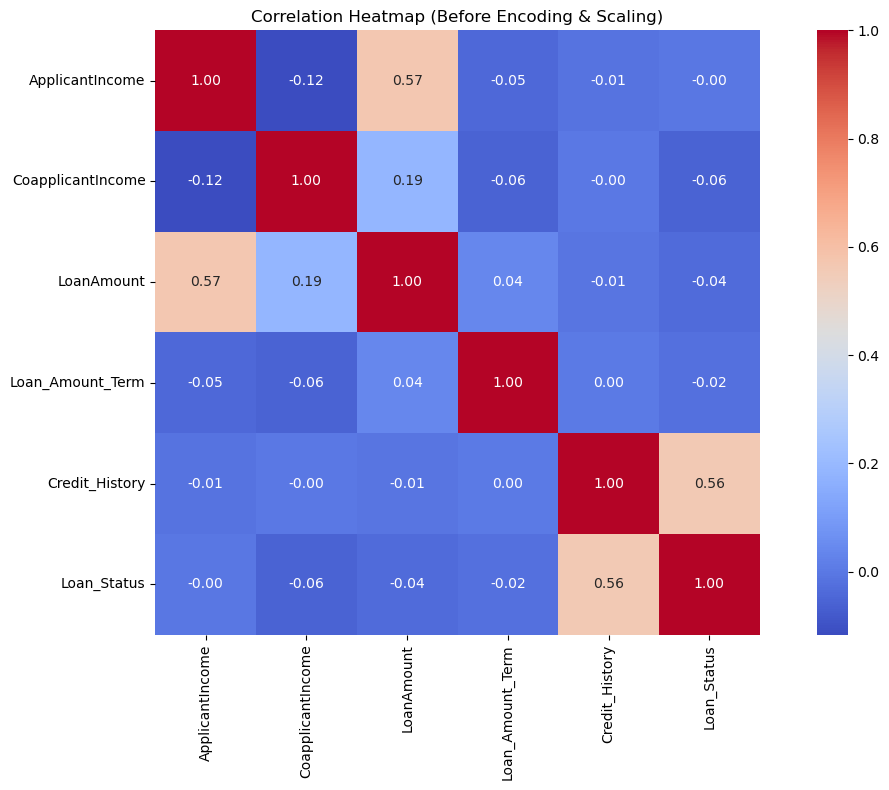

In [295]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make a copy to avoid changing the original
train_corr = train_df.copy()  # Creates a shallow copy of train_df named train_corr. 

# Convert the target to numeric for correlation calculation
train_corr['Loan_Status'] = train_corr['Loan_Status'].map({'Y': 1, 'N': 0})

# Select only numeric columns for correlation
numeric_cols = train_corr.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numeric_cols.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap (Before Encoding & Scaling)')
plt.tight_layout()
plt.show()


##### CreditHistory to loan_Status is 0.56 shows a strong positive correlation.Applicant with a positive creditHistory are more likely for their loan request to be approved.
##### LoanAmount to ApplicantIncome is 0.57 shows a strong positive correlation. The higher the ApplicantIncome of the applicant, the higer the LoanAmount approved. lenders approve larger loans for higher-income applicants. they both have moderate collinearity.
##### Other / most variable pair like Loan_Amount_term, LoanAmount, and CoapplicantIncome to Loan_Status either show small, negligible or weak correlations because they play minor role in  explaining loan amount or approval in this dataset. Approval depends more on credit history than on LoanAmount.


#### Data Cleaning and Preprocessing

In [298]:
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']:
    train_df[col] = train_df[col].fillna(train_df[col].mode()[0])

In [299]:
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']:
    test_df[col] = test_df[col].fillna(test_df[col].mode()[0])

In [300]:
# Fill missing numerical values with median
num_cols = ['LoanAmount', 'Loan_Amount_Term']
for col in num_cols:
    train_df[col] = train_df[col].fillna(train_df[col].median())

In [301]:
# Fill missing numerical values with median
num_cols = ['LoanAmount', 'Loan_Amount_Term']
for col in num_cols:
    test_df[col]  = test_df[col].fillna(test_df[col].median())

In [302]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [303]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         367 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      367 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [304]:
train_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [305]:
test_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [306]:
# treating outlier for both train and test
# Step 1: Define the function
def cap_outliers_with_train(series, lower, upper):
    return series.clip(lower, upper)

# Step 2: Apply to both train and test using train's quantile limits
for col in num_cols:
    lower = train_df[col].quantile(0.05)
    upper = train_df[col].quantile(0.95)
    
    train_df[col] = cap_outliers_with_train(train_df[col], lower, upper)
    test_df[col] = cap_outliers_with_train(test_df[col], lower, upper)

#### Feature Engineering

In [308]:
# Combine incomes
train_df['TotalIncome'] = train_df['ApplicantIncome'] + train_df['CoapplicantIncome']
test_df['TotalIncome'] = test_df['ApplicantIncome'] + test_df['CoapplicantIncome']

# Debt-to-Income Ratio
train_df['DebtToIncome'] = train_df['LoanAmount'] / (train_df['TotalIncome'] + 1)
test_df['DebtToIncome'] = test_df['LoanAmount'] / (test_df['TotalIncome'] + 1)

# Log transformation to reduce skew
train_df['LoanAmount_log'] = np.log(train_df['LoanAmount'] + 1)
train_df['TotalIncome_log'] = np.log(train_df['TotalIncome'] + 1)

# Log transformation to reduce skew
test_df['LoanAmount_log'] = np.log(test_df['LoanAmount'] + 1)
test_df['TotalIncome_log'] = np.log(test_df['TotalIncome'] + 1)

###### Encoding

In [310]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns
cat_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Dependents']

# Initialize LabelEncoder
le = LabelEncoder()

# Apply Label Encoding to binary columns
binary_cols = ['Gender', 'Married', 'Education', 'Self_Employed']

for col in binary_cols:
    # Combine train and test to handle unseen values
    combined = pd.concat([train_df[col], test_df[col]], axis=0)
    
    le.fit(combined)
    
    train_df[col] = le.transform(train_df[col])
    test_df[col] = le.transform(test_df[col])

# One-Hot Encode multi-category column(s)
train_df = pd.get_dummies(train_df, columns=['Property_Area', 'Dependents'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Property_Area', 'Dependents'], drop_first=True)

# Align both datasets to have same columns
train_df, test_df = train_df.align(test_df, join='left', axis=1, fill_value=0)

###### Feature Scaling

In [312]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns to scale
scale_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'LoanAmount_log',
              'TotalIncome', 'TotalIncome_log', 'DebtToIncome']

# Initialize scaler
scaler = StandardScaler()

# Fit on train, transform both train and test
train_df[scale_cols] = scaler.fit_transform(train_df[scale_cols])
test_df[scale_cols] = scaler.transform(test_df[scale_cols])

In [313]:
# Remove target from test set
if 'Loan_Status' in test_df.columns:
    test_df.drop('Loan_Status', axis=1, inplace=True)

# Encode target in train_df properly (if not already done)
train_df['Loan_Status'] = train_df['Loan_Status'].map({'Y': 1, 'N': 0}).astype(int)

In [314]:
# Combine the dtypes into a single DataFrame for side-by-side view
dtype_compare = pd.DataFrame({
    'train_df_dtypes': train_df.dtypes,
    'test_df_dtypes': test_df.dtypes
})

# Display the result
print(dtype_compare)


                        train_df_dtypes test_df_dtypes
ApplicantIncome                 float64        float64
CoapplicantIncome               float64        float64
Credit_History                  float64        float64
DebtToIncome                    float64        float64
Dependents_1                       bool           bool
Dependents_2                       bool           bool
Dependents_3+                      bool           bool
Education                         int32          int32
Gender                            int32          int32
LoanAmount                      float64        float64
LoanAmount_log                  float64        float64
Loan_Amount_Term                float64        float64
Loan_ID                          object         object
Loan_Status                       int32            NaN
Married                           int32          int32
Property_Area_Semiurban            bool           bool
Property_Area_Urban                bool           bool
Self_Emplo

#### Split Data

In [316]:
X = train_df.drop(['Loan_ID', 'Loan_Status', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'TotalIncome'], axis=1)
y = train_df['Loan_Status']

# For test data, drop similar columns
X_test_final = test_df.drop(['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'TotalIncome'], axis=1)

#### Model Building and Training

In [318]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split into train & validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [319]:
# Build model
model = LogisticRegression(max_iter=1000)

In [320]:
y_train.isnull().sum()

0

In [321]:
# Example: fill with most frequent class
y_train = y_train.fillna(y_train.mode()[0])

In [322]:
print(y_train.isnull().sum())  # Should be 0 now

0


In [323]:
# Train model
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

#### Evaluation

In [325]:
# Predict on validation set
y_pred = model.predict(X_val)

# Evaluate
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))

Accuracy: 0.7886178861788617
Confusion Matrix:
 [[18 25]
 [ 1 79]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



In [326]:
# Predict
test_pred = model.predict(X_test_final)

In [327]:
# Create submission file
Loan_submission = pd.DataFrame({
    'Loan_ID': test_df['Loan_ID'],
    'Loan_Status': np.where(test_pred==1, 'Y', 'N')
})

In [328]:
# Save to CSV
Loan_submission.to_csv('loan_prediction_submission.csv', index=False)
print("Loan Submission file saved!")

Loan Submission file saved!


In [329]:
import joblib

# Save the trained model to a file
joblib.dump(model, 'logistic_regression_model.pkl')
print("Model saved successfully as 'logistic_regression_model.pkl'")

Model saved successfully as 'logistic_regression_model.pkl'


#### Prediction on test_df

In [331]:
# Create same features as in training
test_df['TotalIncome'] = test_df['ApplicantIncome'] + test_df['CoapplicantIncome']
test_df['DebtToIncome'] = test_df['LoanAmount'] / (test_df['TotalIncome'] + 1)
test_df['LoanAmount_log'] = np.log(test_df['LoanAmount'] + 1)
test_df['TotalIncome_log'] = np.log(test_df['TotalIncome'] + 1)

# Drop features not used in training
columns_to_drop = ['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'TotalIncome']
test_df = test_df.drop(columns=columns_to_drop, errors='ignore')

# Ensure categorical columns are encoded like in training
test_df = pd.get_dummies(test_df)

# Match columns with training set
# Add any missing columns that were in training but not in test, and fill with 0
missing_cols = set(X_train.columns) - set(test_df.columns)
for col in missing_cols:
    test_df[col] = 0

# Reorder columns to match training set
test_df = test_df[X_train.columns]


C:\Users\HP\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [332]:
# Replace infinite and NaN with 0 or another safe value
test_df = test_df.replace([np.inf, -np.inf], np.nan)
test_df = test_df.fillna(0)


In [333]:
# Predict using logistic regression model
test_predictions = model.predict(test_df)

# Convert 1/0 to 'Y'/'N'
predicted_labels = ['Y' if pred == 1 else 'N' for pred in test_predictions]

# Save predictions
# test_df['Loan_ID'] = test_df_original['Loan_ID']  
submission = pd.DataFrame({
    'Loan_Status': predicted_labels
    # 'Loan_ID': test_df_original['Loan_ID'] 
})

submission.to_csv('loan_predictions.csv', index=False)
print("✅ Predictions saved successfully to 'loan_predictions.csv'")


✅ Predictions saved successfully to 'loan_predictions.csv'
